<a href="https://colab.research.google.com/github/anjithababuraj/Projects/blob/main/Indian_Weather_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INDIAN WEATHER REPOSITORY(DAILY UPDATING)**

Create machine learning model for analyzing India's present weather trends and exploring the relationships between various weather parameters

IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATA LOADING

In [2]:
data=pd.read_csv('/content/IndianWeatherRepository.csv')
data

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101336,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1709571600,2024-03-04 22:30,17.0,62.6,...,59.9,111.3,3,8,06:42 AM,06:21 PM,01:36 AM,11:43 AM,Waning Crescent,46
101337,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1709571600,2024-03-04 22:30,14.3,57.8,...,93.5,102.3,4,10,05:39 AM,05:24 PM,12:19 AM,10:55 AM,Waning Crescent,46
101338,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1709571600,2024-03-04 22:30,22.6,72.7,...,58.7,71.4,3,7,06:27 AM,06:22 PM,12:47 AM,12:17 PM,Waning Crescent,46
101339,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1709571600,2024-03-04 22:30,29.0,84.2,...,35.3,45.1,2,3,06:33 AM,06:32 PM,12:47 AM,12:35 PM,Waning Crescent,46


DATA INFORMATIONS

In [3]:
# first 5 rows of the data
data.head()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,India,Ashoknagar,Madhya Pradesh,24.57,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,12.6,18.5,1,2,05:59 AM,06:41 PM,05:42 PM,03:38 AM,Waxing Gibbous,93
1,India,Raisen,Madhya Pradesh,23.33,77.80,Asia/Kolkata,1693286100,2023-08-29 10:45,27.5,81.5,...,10.7,14.2,1,1,06:00 AM,06:40 PM,05:39 PM,03:41 AM,Waxing Gibbous,93
2,India,Chhindwara,Madhya Pradesh,22.07,78.93,Asia/Kolkata,1693286100,2023-08-29 10:45,26.3,79.3,...,16.8,20.7,2,2,05:56 AM,06:34 PM,05:32 PM,03:39 AM,Waxing Gibbous,93
3,India,Betul,Madhya Pradesh,21.86,77.93,Asia/Kolkata,1693286100,2023-08-29 10:45,25.6,78.1,...,4.9,6.6,1,1,06:00 AM,06:38 PM,05:36 PM,03:43 AM,Waxing Gibbous,93
4,India,Hoshangabad,Madhya Pradesh,22.75,77.72,Asia/Kolkata,1693286100,2023-08-29 10:45,27.2,81.0,...,11.4,14.8,1,1,06:01 AM,06:39 PM,05:38 PM,03:42 AM,Waxing Gibbous,93


In [4]:
# last 5 rows of the data
data.tail()

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
101336,India,Niwari,Uttar Pradesh,28.88,77.53,Asia/Kolkata,1709571600,2024-03-04 22:30,17.0,62.6,...,59.9,111.3,3,8,06:42 AM,06:21 PM,01:36 AM,11:43 AM,Waning Crescent,46
101337,India,Saitual,Mizoram,23.97,92.58,Asia/Kolkata,1709571600,2024-03-04 22:30,14.3,57.8,...,93.5,102.3,4,10,05:39 AM,05:24 PM,12:19 AM,10:55 AM,Waning Crescent,46
101338,India,Ranipet,Tamil Nadu,12.93,79.33,Asia/Kolkata,1709571600,2024-03-04 22:30,22.6,72.7,...,58.7,71.4,3,7,06:27 AM,06:22 PM,12:47 AM,12:17 PM,Waning Crescent,46
101339,India,Tenkasi,Tamil Nadu,8.97,77.30,Asia/Kolkata,1709571600,2024-03-04 22:30,29.0,84.2,...,35.3,45.1,2,3,06:33 AM,06:32 PM,12:47 AM,12:35 PM,Waning Crescent,46
101340,India,Pendra,Maharashtra,21.93,74.15,Asia/Kolkata,1709571600,2024-03-04 22:30,19.4,66.9,...,16.1,26.0,2,2,06:21 AM,06:07 PM,01:00 AM,11:42 AM,Waning Crescent,46


In [5]:
# no. of rows and no. of columns in the data
data.shape

(101341, 42)

In [6]:
# columns included in the data
data.columns

Index(['country', 'location_name', 'region', 'latitude', 'longitude',
       'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [7]:
# datatype of each column
data.dtypes

country                          object
location_name                    object
region                           object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                     object
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64


In [8]:
# statistical data  of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,101341.0,2.309764e+01,5.791065e+00,7.170000e+00,2.027000e+01,2.395000e+01,2.677000e+01,3.457000e+01
longitude,101341.0,8.024551e+01,5.762573e+00,6.897000e+01,7.607000e+01,7.869000e+01,8.390000e+01,9.580000e+01
last_updated_epoch,101341.0,1.701463e+09,4.785645e+06,1.693286e+09,1.697231e+09,1.701635e+09,1.705602e+09,1.709572e+09
temperature_celsius,101341.0,1.951635e+01,6.205026e+00,-3.070000e+01,1.600000e+01,2.060000e+01,2.400000e+01,3.830000e+01
temperature_fahrenheit,101341.0,6.712949e+01,1.116889e+01,-2.330000e+01,6.080000e+01,6.900000e+01,7.520000e+01,1.009000e+02
wind_mph,101341.0,4.817111e+00,2.688909e+00,2.200000e+00,2.700000e+00,4.300000e+00,6.000000e+00,2.680000e+01
wind_kph,101341.0,7.757530e+00,4.319181e+00,3.600000e+00,4.300000e+00,6.800000e+00,9.700000e+00,4.320000e+01
wind_degree,101341.0,1.522521e+02,1.148212e+02,1.000000e+00,5.100000e+01,1.140000e+02,2.670000e+02,3.600000e+02
pressure_mb,101341.0,1.013012e+03,5.046791e+00,9.910000e+02,1.010000e+03,1.014000e+03,1.016000e+03,1.073000e+03
pressure_in,101341.0,2.991378e+01,1.489105e-01,2.928000e+01,2.984000e+01,2.994000e+01,3.001000e+01,3.169000e+01


In [9]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101341 entries, 0 to 101340
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       101341 non-null  object 
 1   location_name                 101341 non-null  object 
 2   region                        101341 non-null  object 
 3   latitude                      101341 non-null  float64
 4   longitude                     101341 non-null  float64
 5   timezone                      101341 non-null  object 
 6   last_updated_epoch            101341 non-null  int64  
 7   last_updated                  101341 non-null  object 
 8   temperature_celsius           101341 non-null  float64
 9   temperature_fahrenheit        101341 non-null  float64
 10  condition_text                101341 non-null  object 
 11  wind_mph                      101341 non-null  float64
 12  wind_kph                      101341 non-nul

In [10]:
# to find missing values
data.isna().sum()
# data.dropna(inplace=True)
# if missing value in numeric column fill by mean or median
# if missing value in object column fill by mode

country                         0
location_name                   0
region                          0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Oz

DATA PREPROCESSING STEPS

In [11]:
# to find unique values in the column 'condition_text'
print(data['condition_text'].nunique())
data['condition_text'].unique()

49


array(['Partly cloudy', 'Sunny', 'Cloudy', 'Mist', 'Patchy rain possible',
       'Overcast', 'Patchy light rain with thunder', 'Light rain shower',
       'Moderate or heavy rain shower', 'Clear', 'Light rain',
       'Torrential rain shower', 'Fog', 'Thundery outbreaks possible',
       'Patchy light drizzle', 'Moderate rain', 'Patchy light rain',
       'Moderate rain at times', 'Heavy rain', 'Heavy rain at times',
       'Light drizzle', 'Moderate or heavy rain with thunder',
       'Patchy snow possible', 'Moderate or heavy snow showers',
       'Light snow showers', 'Moderate or heavy snow with thunder',
       'Patchy light snow with thunder', 'Light sleet',
       'Light freezing rain', 'Patchy light snow', 'Patchy moderate snow',
       'Light snow', 'Moderate snow', 'Overcast ', 'Clear ', 'Cloudy ',
       'Partly Cloudy ', 'Patchy rain nearby',
       'Thundery outbreaks in nearby', 'Heavy snow',
       'Patchy light snow in area with thunder',
       'Patchy light rain in a

In [12]:
# there are 49 different values in this column, need to standardize these values
data['condition_text']=[i.lower() for i in data['condition_text']]
data['condition_text']

0         partly cloudy
1                 sunny
2         partly cloudy
3                cloudy
4                cloudy
              ...      
101336             mist
101337           clear 
101338           clear 
101339             mist
101340           clear 
Name: condition_text, Length: 101341, dtype: object

In [13]:
data['condition_text']=data['condition_text'].str.replace('cloudy ','cloudy')
data['condition_text']=data['condition_text'].str.replace('clear ','clear')

In [14]:
print(data['condition_text'].value_counts())

condition_text
clear                                          59481
mist                                           14167
partly cloudy                                  10256
patchy rain possible                            5126
light rain shower                               2840
fog                                             2005
overcast                                        1664
cloudy                                          1540
patchy rain nearby                               824
sunny                                            772
light rain                                       461
moderate or heavy rain shower                    395
light drizzle                                    259
patchy light drizzle                             214
moderate or heavy rain with thunder              206
overcast                                         183
moderate rain                                    169
patchy light rain                                138
moderate rain at times         

In [15]:
from itertools import chain
# it takes multiple iterables and returns an iterator that produces elements from the first iterable until it's exhausted,
# then it continues with the next iterable, until all of the iterables are exhausted.
def create_list(x):
  list1=[w.split() for w in x.split(',')]
  # This is a list comprehension that iterates over each substring produced by splitting x by commas.
  # For each substring w, it further splits w by whitespace, creating a list of words.
  list2=list(chain(*list1))
  # This converts the flattened iterator produced by chain back into a list.
  return list2

In [16]:
# the 49 categories converted into 4 by following
def get_list(list3):
  if 'clear' in list3 or 'sunny' in list3:
    return 'CLEAR'
  elif 'mist' in list3 or 'fog' in list3 or 'snow' in list3:
    return 'MISTY'
  elif 'cloudy' in list3 or 'overcast' in list3:
    return 'CLOUDY'
  else:
    return 'RAINY'

In [17]:
# the column 'condition_text' is rename as weather with 4 unique categories
data['weather']=data['condition_text'].apply(lambda x:get_list(create_list(x)))
data['weather']

0         CLOUDY
1          CLEAR
2         CLOUDY
3         CLOUDY
4         CLOUDY
           ...  
101336     MISTY
101337     CLEAR
101338     CLEAR
101339     MISTY
101340     CLEAR
Name: weather, Length: 101341, dtype: object

In [18]:
print(data['weather'].value_counts())

weather
CLEAR     60253
MISTY     16363
CLOUDY    13643
RAINY     11082
Name: count, dtype: int64


In [19]:
# there is a huge difference for 'CLEAR', to balance the categories select 11000 samples randomly
clear_df=data[data['weather']=='CLEAR'].sample(n=11000)
misty_df=data[data['weather']=='MISTY'].sample(n=11000)
cloudy_df=data[data['weather']=='CLOUDY'].sample(n=11000)
rainy_df=data[data['weather']=='RAINY'].sample(n=11000)

In [20]:
# now it become balanced
new_data=pd.concat([clear_df,misty_df,cloudy_df,rainy_df],axis=0,ignore_index=True)
new_data

,country,location_name,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,...,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,weather
0,India,Garhwal,Uttarakhand,29.80,78.62,Asia/Kolkata,1694701800,2023-09-14 20:00,27.8,82.0,...,55.1,2,4,05:59 AM,06:23 PM,05:07 AM,06:14 PM,New Moon,1,CLEAR
1,India,Saharanpur,Uttar Pradesh,29.97,77.55,Asia/Kolkata,1703873700,2023-12-29 23:45,12.8,55.0,...,266.4,5,10,07:15 AM,05:29 PM,07:35 PM,09:12 AM,Waning Gibbous,96,CLEAR
2,India,Mon,Nagaland,26.75,95.10,Asia/Kolkata,1693784700,2023-09-04 05:15,24.5,76.1,...,30.4,2,2,04:50 AM,05:28 PM,07:46 PM,08:02 AM,Waning Gibbous,88,CLEAR
3,India,Banka,Bihar,24.88,86.92,Asia/Kolkata,1704479400,2024-01-06 00:00,17.3,63.1,...,322.8,6,10,06:28 AM,05:07 PM,12:20 AM,12:03 PM,Waning Crescent,42,CLEAR
4,India,Bhagalpur,Bihar,25.25,87.00,Asia/Kolkata,1700941500,2023-11-26 01:15,19.7,67.4,...,257.7,5,10,06:06 AM,04:52 PM,03:17 PM,03:46 AM,Waxing Gibbous,93,CLEAR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,India,Budaun,Uttar Pradesh,28.05,79.12,Asia/Kolkata,1693956600,2023-09-06 05:00,27.5,81.5,...,105.6,4,10,05:54 AM,06:30 PM,10:06 PM,11:19 AM,Waning Gibbous,70,RAINY
43996,India,Sitamarhi,Bihar,26.60,85.48,Asia/Kolkata,1697576400,2023-10-18 02:30,22.0,71.6,...,284.4,5,10,05:48 AM,05:19 PM,08:01 AM,06:52 PM,Waxing Crescent,5,RAINY
43997,India,Alappuzha,Kerala,9.49,76.33,Asia/Kolkata,1706032800,2024-01-23 23:30,26.7,80.0,...,69.1,3,8,06:46 AM,06:26 PM,04:26 PM,04:40 AM,Waxing Gibbous,93,RAINY
43998,India,Saharsa,Bihar,25.88,86.60,Asia/Kolkata,1708536600,2024-02-21 23:00,20.1,68.1,...,157.0,4,10,06:15 AM,05:40 PM,02:51 PM,04:18 AM,Waxing Gibbous,89,RAINY


In [21]:
print(new_data.shape)
new_data['weather'].unique()

(44000, 43)


array(['CLEAR', 'MISTY', 'CLOUDY', 'RAINY'], dtype=object)

In [22]:
new_data['weather'].value_counts()

weather
CLEAR     11000
MISTY     11000
CLOUDY    11000
RAINY     11000
Name: count, dtype: int64

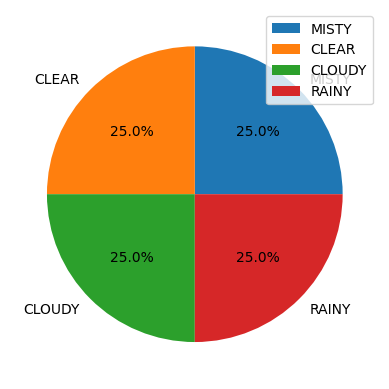

In [23]:
# To visualize the part of each
p=['MISTY','CLEAR','CLOUDY','RAINY']
q=[11000,11000,11000,11000]
plt.pie(q,labels=p,autopct='%1.1f%%')
plt.legend()
plt.show()

In [24]:
# map each categories into 0,1,2 and 3
new_data['weather']=new_data['weather'].map({'MISTY':0,'CLEAR':1,'CLOUDY':2,'RAINY':3})

OBJECT COLUMNS

In [25]:
new_data['country'].unique()
# since it has only one value it doesn't affect the output, so can drop this column

array(['India'], dtype=object)

In [26]:
# to find unique values in 'loaction_name'
new_data['location_name'].unique()
# since there are many values, it can't give perfection to the model

array(['Garhwal', 'Saharanpur', 'Mon', 'Banka', 'Bhagalpur', 'Deoria',
       'Mokokchung', 'Bhojpur', 'Sangli', 'Shajapur', 'Surguja', 'Moga',
       'Supaul', 'Wokha', 'Khowai', 'Shahdol', 'Baudh', 'Bilaspur',
       'Sheopur', 'Sirmaur', 'Mirzapur', 'Murshidabad', 'Latur', 'Ganjam',
       'Bhiwani', 'Dewas', 'Shahjahanpur', 'Meerut', 'Kangra', 'Solapur',
       'Pithoragarh', 'Sawai Madhopur', 'Saharsa', 'Dhalai', 'Panipat',
       'Jagtial', 'Una', 'Khandwa', 'Kokrajhar', 'Rewa', 'Pratapgarh',
       'Bokaro', 'Bharatpur', 'Rampur', 'Simdega', 'Sitamarhi', 'Churu',
       'Buldana', 'Hamirpur', 'Kota', 'Chikmagalur', 'Thoubal',
       'Muzaffarnagar', 'Wanaparthy', 'Mathura', 'Bhadrak', 'Dhanbad',
       'Baran', 'Kupwara', 'Golaghat', 'Anand', 'Auraiya', 'Sambalpur',
       'Hailakandi', 'Rajkot', 'Jangaon', 'Nagar', 'Baleshwar',
       'Kolhapur', 'Nadia', 'Mandsaur', 'Krishna', 'Champawat', 'Araria',
       'Jhargram', 'Bahraich', 'Darbhanga', 'Junagadh', 'Lohardaga',
       'D

In [27]:
# to find unique values in 'region'
new_data['region'].unique()

array(['Uttarakhand', 'Uttar Pradesh', 'Nagaland', 'Bihar', 'Orissa',
       'Maharashtra', 'Madhya Pradesh', 'Chhattisgarh', 'Punjab',
       'Tripura', 'West Bengal', 'Haryana', 'Himachal Pradesh',
       'Rajasthan', 'Assam', 'Andhra Pradesh', 'Gujarat', 'Jharkhand',
       'Karnataka', 'Manipur', 'Jammu and Kashmir', 'Lakshadweep',
       'Tamil Nadu', 'Daman and Diu', 'Mizoram', 'Kerala', 'Goa',
       'Arunachal Pradesh', 'Andaman and Nicobar Islands',
       'Dadra and Nagar Haveli', 'Puducherry', 'Chandigarh', 'Delhi'],
      dtype=object)

region
Uttar Pradesh                  4264
Madhya Pradesh                 3418
Tamil Nadu                     3414
Andhra Pradesh                 2825
Maharashtra                    2522
Orissa                         2298
Bihar                          2192
Karnataka                      2184
Rajasthan                      2176
Assam                          1901
West Bengal                    1850
Kerala                         1817
Chhattisgarh                   1593
Jharkhand                      1513
Gujarat                        1463
Jammu and Kashmir              1428
Haryana                        1403
Punjab                         1315
Manipur                         703
Uttarakhand                     633
Nagaland                        619
Mizoram                         557
Himachal Pradesh                340
Puducherry                      276
Delhi                           246
Tripura                         189
Goa                             183
Arunachal Pradesh    

<Axes: xlabel='region'>

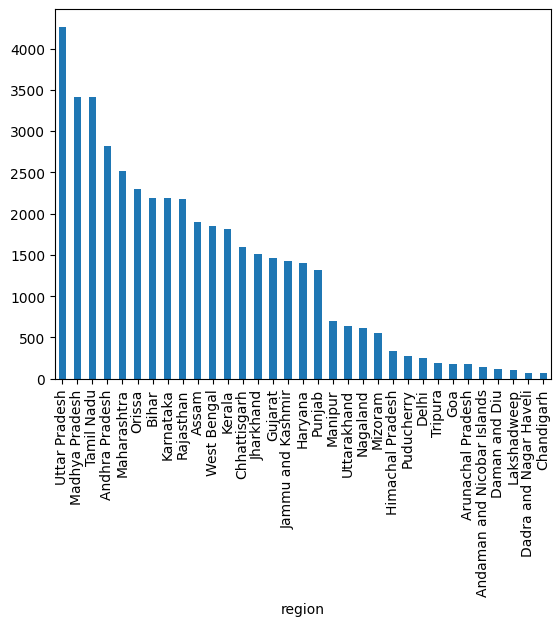

In [28]:
# 'region' counts and its graphical representation
print(new_data['region'].value_counts())
new_data['region'].value_counts().plot(kind='bar')

In [29]:
# to find unique values in the column 'timezone'
new_data['timezone'].unique()

array(['Asia/Kolkata', 'Asia/Dhaka', 'Asia/Karachi'], dtype=object)

timezone
Asia/Kolkata    43784
Asia/Dhaka        157
Asia/Karachi       59
Name: count, dtype: int64


<Axes: xlabel='timezone'>

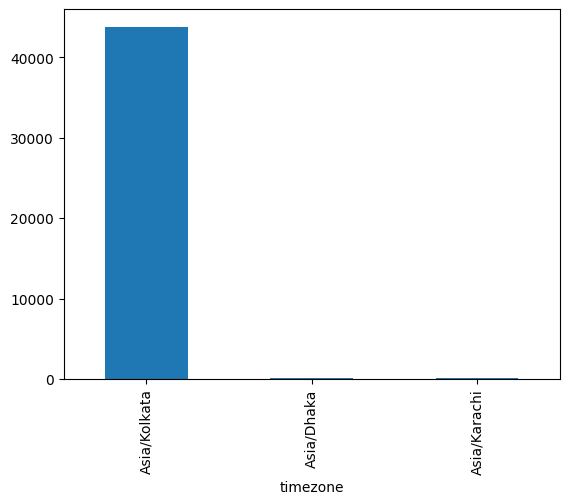

In [30]:
# 'timezone' counts and its graphical representation
print(new_data['timezone'].value_counts())
new_data['timezone'].value_counts().plot(kind='bar')

In [31]:
# to find unique values in the column 'wind_direction'
new_data['wind_direction'].unique()

array(['ENE', 'NNE', 'SE', 'NW', 'E', 'W', 'NE', 'ESE', 'SSE', 'S', 'NNW',
       'SSW', 'SW', 'N', 'WNW', 'WSW'], dtype=object)

wind_direction
N      5398
ENE    4462
NE     4191
E      4097
NNE    3364
ESE    2867
W      2696
WSW    2501
WNW    2318
NNW    2259
SE     2241
NW     2161
SW     1501
SSW    1361
SSE    1351
S      1232
Name: count, dtype: int64


<Axes: xlabel='wind_direction'>

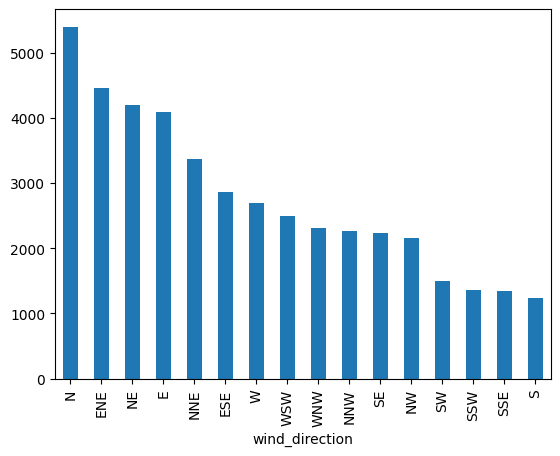

In [32]:
# 'wind_direction' counts and its graphical representation
print(new_data['wind_direction'].value_counts())
new_data['wind_direction'].value_counts().plot(kind='bar')

In [33]:
# to find unique values in the column 'moon_phase'
new_data['moon_phase'].unique()

array(['New Moon', 'Waning Gibbous', 'Waning Crescent', 'Waxing Gibbous',
       'Last Quarter', 'Waxing Crescent', 'First Quarter', 'Full Moon'],
      dtype=object)

moon_phase
Waning Gibbous     10775
Waning Crescent     9199
Waxing Crescent     8647
Waxing Gibbous      8545
Full Moon           2042
Last Quarter        1766
New Moon            1701
First Quarter       1325
Name: count, dtype: int64


<Axes: xlabel='moon_phase'>

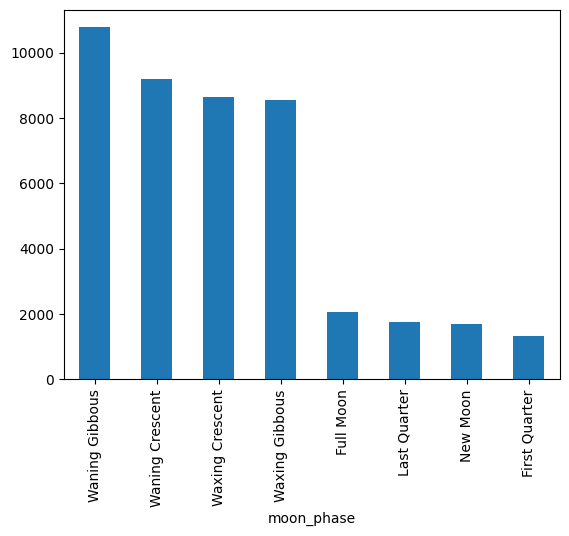

In [34]:
# 'moon_phase' counts and its graphical representation
print(new_data['moon_phase'].value_counts())
new_data['moon_phase'].value_counts().plot(kind='bar')

In [35]:
# object datatype column converted into datetime format
new_data['last_updated']=pd.to_datetime(new_data['last_updated'])
new_data['last_updated']

0       2023-09-14 20:00:00
1       2023-12-29 23:45:00
2       2023-09-04 05:15:00
3       2024-01-06 00:00:00
4       2023-11-26 01:15:00
                ...        
43995   2023-09-06 05:00:00
43996   2023-10-18 02:30:00
43997   2024-01-23 23:30:00
43998   2024-02-21 23:00:00
43999   2023-11-10 01:45:00
Name: last_updated, Length: 44000, dtype: datetime64[ns]

In [36]:
# categorized using month, since weather always
new_data['last_updated']=new_data['last_updated'].dt.month
new_data['last_updated']

0         9
1        12
2         9
3         1
4        11
         ..
43995     9
43996    10
43997     1
43998     2
43999    11
Name: last_updated, Length: 44000, dtype: int32

In [37]:
# to delete string from the time format hh:mm
new_data['sunrise']=new_data['sunrise'].str.replace(' AM','')
new_data['sunset']=new_data['sunset'].str.replace(' PM','')
new_data['moonrise']=new_data['moonrise'].str.replace(' PM','')
new_data['moonrise']=new_data['moonrise'].str.replace(' AM','')
new_data['moonrise']=new_data['moonrise'].str.replace('No moonrise','00:00')
new_data['moonset']=new_data['moonset'].str.replace(' AM','')
new_data['moonset']=new_data['moonset'].str.replace(' PM','')
new_data['moonset']=new_data['moonset'].str.replace('No moonset','00:00')

In [38]:
# hh:mm convert into hours, so it changes its datatype as float
new_data['sunrise']=pd.to_datetime(new_data['sunrise'])
new_data['sunrise']=((new_data['sunrise'].dt.hour)+(1/60*(new_data['sunrise'].dt.minute)))
new_data['sunrise']

<ipython-input-38-ea36d5288426>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['sunrise']=pd.to_datetime(new_data['sunrise'])


0        5.983333
1        7.250000
2        4.833333
3        6.466667
4        6.100000
           ...   
43995    5.900000
43996    5.800000
43997    6.766667
43998    6.250000
43999    6.216667
Name: sunrise, Length: 44000, dtype: float64

In [39]:
new_data['sunset']=pd.to_datetime(new_data['sunset'])
new_data['sunset']=((new_data['sunset'].dt.hour)+(1/60*(new_data['sunset'].dt.minute)))
new_data['sunset']

<ipython-input-39-2b1d421928f2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['sunset']=pd.to_datetime(new_data['sunset'])


0        6.383333
1        5.483333
2        5.466667
3        5.116667
4        4.866667
           ...   
43995    6.500000
43996    5.316667
43997    6.433333
43998    5.666667
43999    5.883333
Name: sunset, Length: 44000, dtype: float64

In [40]:
new_data['moonrise']=pd.to_datetime(new_data['moonrise'])
new_data['moonrise']=((new_data['moonrise'].dt.hour)+(1/60*(new_data['moonrise'].dt.minute)))
new_data['moonrise']

<ipython-input-40-b4a1ed35edef>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['moonrise']=pd.to_datetime(new_data['moonrise'])


0         5.116667
1         7.583333
2         7.766667
3        12.333333
4         3.283333
           ...    
43995    10.100000
43996     8.016667
43997     4.433333
43998     2.850000
43999     2.816667
Name: moonrise, Length: 44000, dtype: float64

In [41]:
new_data['moonset']=pd.to_datetime(new_data['moonset'])
new_data['moonset']=((new_data['moonset'].dt.hour)+(1/60*(new_data['moonset'].dt.minute)))
new_data['moonset']

<ipython-input-41-55ebb45822dd>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  new_data['moonset']=pd.to_datetime(new_data['moonset'])


0         6.233333
1         9.200000
2         8.033333
3        12.050000
4         3.766667
           ...    
43995    11.316667
43996     6.866667
43997     4.666667
43998     4.300000
43999     3.216667
Name: moonset, Length: 44000, dtype: float64

In [42]:
# to check datatype
new_data.dtypes

country                          object
location_name                    object
region                           object
latitude                        float64
longitude                       float64
timezone                         object
last_updated_epoch                int64
last_updated                      int32
temperature_celsius             float64
temperature_fahrenheit          float64
condition_text                   object
wind_mph                        float64
wind_kph                        float64
wind_degree                       int64
wind_direction                   object
pressure_mb                     float64
pressure_in                     float64
precip_mm                       float64
precip_in                       float64
humidity                          int64
cloud                             int64
feels_like_celsius              float64
feels_like_fahrenheit           float64
visibility_km                   float64
visibility_miles                float64


<Axes: xlabel='temperature_fahrenheit', ylabel='weather'>

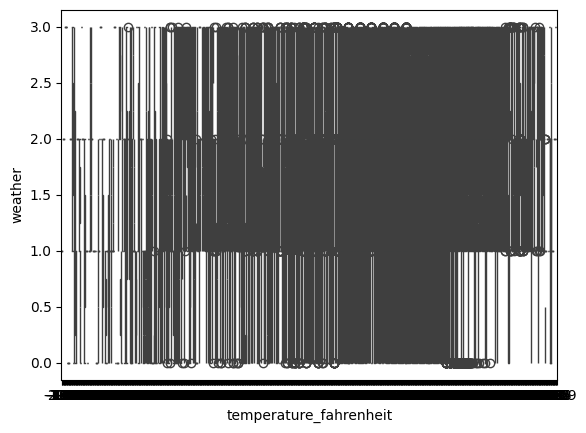

In [43]:
# to detect the presence of outliers
sns.boxplot(x='temperature_fahrenheit',y='weather',data=new_data)

<Axes: xlabel='wind_degree', ylabel='weather'>

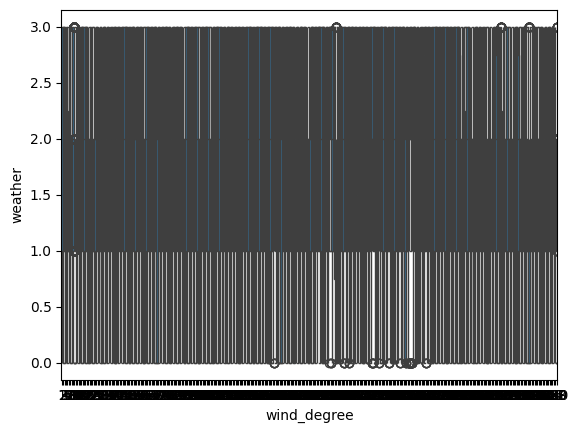

In [44]:
sns.boxplot(x='wind_degree',y='weather',data=new_data)

<Axes: xlabel='pressure_mb', ylabel='weather'>

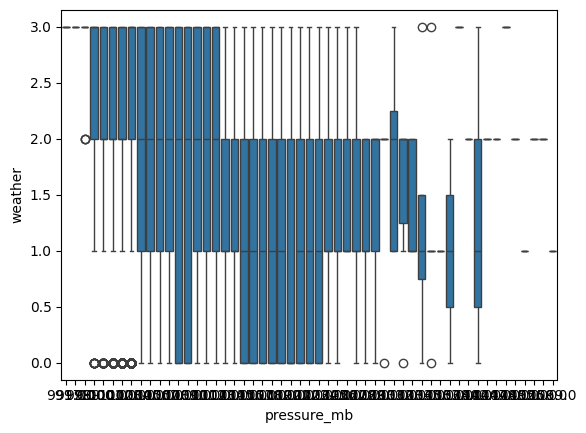

In [45]:
sns.boxplot(x='pressure_mb',y='weather',data=new_data)

<Axes: xlabel='humidity', ylabel='weather'>

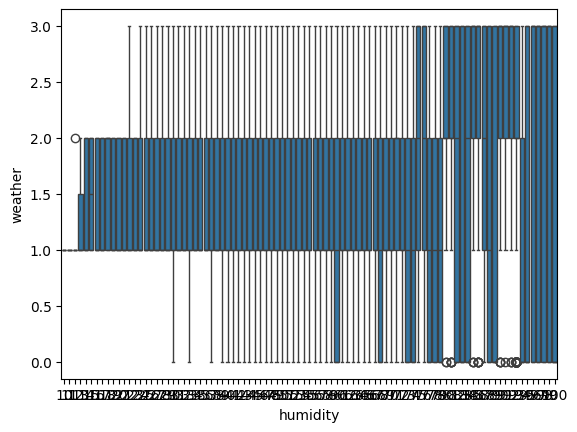

In [46]:
sns.boxplot(x='humidity',y='weather',data=new_data)

<Axes: xlabel='cloud', ylabel='weather'>

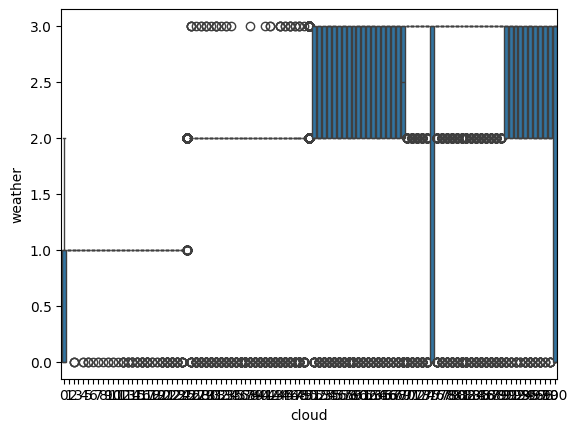

In [47]:
sns.boxplot(x='cloud',y='weather',data=new_data)

<Axes: xlabel='air_quality_us-epa-index', ylabel='weather'>

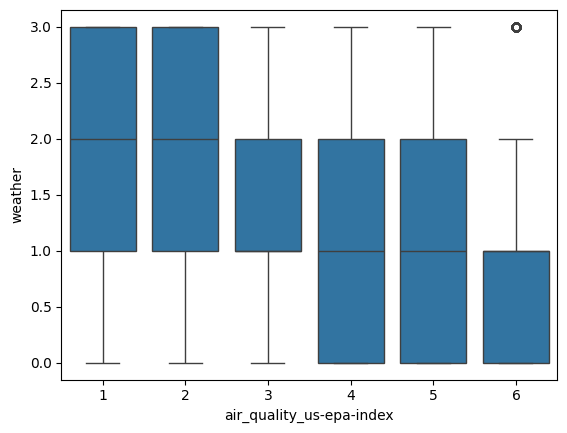

In [48]:
sns.boxplot(x='air_quality_us-epa-index',y='weather',data=new_data)

<Axes: xlabel='air_quality_gb-defra-index', ylabel='weather'>

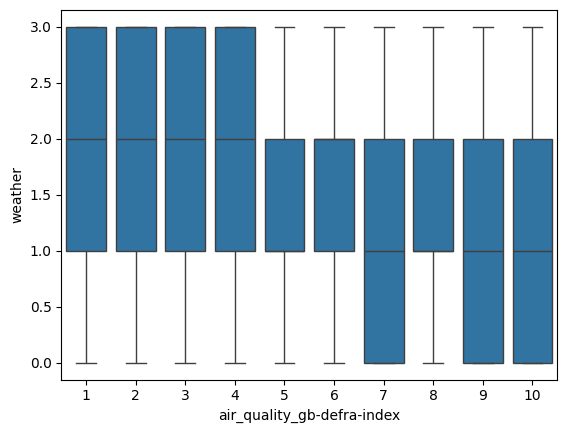

In [49]:
sns.boxplot(x='air_quality_gb-defra-index',y='weather',data=new_data)

<Axes: xlabel='moon_illumination', ylabel='weather'>

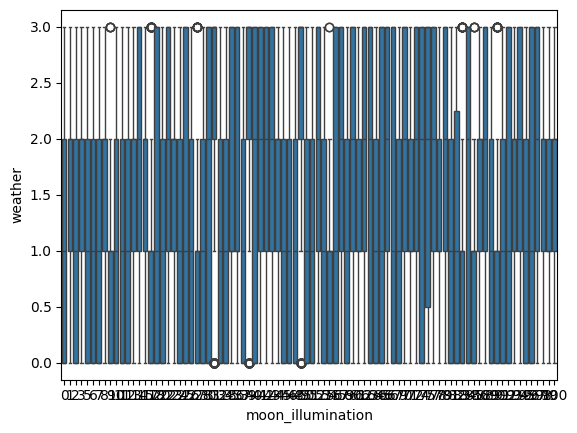

In [50]:
sns.boxplot(x='moon_illumination',y='weather',data=new_data)

In [51]:
# To detect and remove outliers
def outlier_det(new_data,i):
  Q1=np.percentile(new_data[i],25)
  Q3=np.percentile(new_data[i],75)
  lower=Q1-(1.5*(Q3-Q1))
  upper=Q3+(1.5*(Q3-Q1))
  new_data=new_data[(lower<new_data[i]) & (new_data[i]<upper)]
  return new_data

In [52]:
lst=['temperature_fahrenheit','wind_degree','pressure_mb','humidity','cloud','air_quality_us-epa-index','moon_illumination']
for i in lst:
  new_data=outlier_det(new_data,i)

In [53]:
new_data.shape

(42875, 43)

In [54]:
new_data['weather'].value_counts()

weather
0    10839
3    10735
2    10685
1    10616
Name: count, dtype: int64

In [55]:
# to drop unwanted columns
new_data.drop(['country','location_name','condition_text'],axis=1,inplace=True)
new_data.head()

,region,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,...,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination,weather
0,Uttarakhand,29.80,78.62,Asia/Kolkata,1694701800,9,27.8,82.0,3.8,6.1,...,55.1,2,4,5.983333,6.383333,5.116667,6.233333,New Moon,1,1
1,Uttar Pradesh,29.97,77.55,Asia/Kolkata,1703873700,12,12.8,55.0,3.1,5.0,...,266.4,5,10,7.250000,5.483333,7.583333,9.200000,Waning Gibbous,96,1
2,Nagaland,26.75,95.10,Asia/Kolkata,1693784700,9,24.5,76.1,3.6,5.8,...,30.4,2,2,4.833333,5.466667,7.766667,8.033333,Waning Gibbous,88,1
3,Bihar,24.88,86.92,Asia/Kolkata,1704479400,1,17.3,63.1,3.1,5.0,...,322.8,6,10,6.466667,5.116667,12.333333,12.050000,Waning Crescent,42,1
4,Bihar,25.25,87.00,Asia/Kolkata,1700941500,11,19.7,67.4,3.8,6.1,...,257.7,5,10,6.100000,4.866667,3.283333,3.766667,Waxing Gibbous,93,1


In [56]:
# encoded the object columns using get_dummies
data1=pd.get_dummies(new_data[['region','timezone','wind_direction','moon_phase']],drop_first=True)
data1

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,wind_direction_W,wind_direction_WNW,wind_direction_WSW,moon_phase_Full Moon,moon_phase_Last Quarter,moon_phase_New Moon,moon_phase_Waning Crescent,moon_phase_Waning Gibbous,moon_phase_Waxing Crescent,moon_phase_Waxing Gibbous
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
43996,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
43997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
43998,False,False,False,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True


In [57]:
# to join data with encoded data and drop unwanted columns
DATA=pd.concat([data1,new_data],axis=1)
DATA.drop(['region','timezone','wind_direction','moon_phase'],axis=1,inplace=True)
DATA

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination,weather
0,False,False,False,False,False,False,False,False,False,False,...,40.1,55.1,2,4,5.983333,6.383333,5.116667,6.233333,1,1
1,False,False,False,False,False,False,False,False,False,False,...,231.3,266.4,5,10,7.250000,5.483333,7.583333,9.200000,96,1
2,False,False,False,False,False,False,False,False,False,False,...,23.6,30.4,2,2,4.833333,5.466667,7.766667,8.033333,88,1
3,False,False,False,True,False,False,False,False,False,False,...,287.7,322.8,6,10,6.466667,5.116667,12.333333,12.050000,42,1
4,False,False,False,True,False,False,False,False,False,False,...,232.8,257.7,5,10,6.100000,4.866667,3.283333,3.766667,93,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,False,False,False,False,False,False,False,False,False,False,...,93.1,105.6,4,10,5.900000,6.500000,10.100000,11.316667,70,3
43996,False,False,False,True,False,False,False,False,False,False,...,239.6,284.4,5,10,5.800000,5.316667,8.016667,6.866667,5,3
43997,False,False,False,False,False,False,False,False,False,False,...,59.3,69.1,3,8,6.766667,6.433333,4.433333,4.666667,93,3
43998,False,False,False,True,False,False,False,False,False,False,...,132.4,157.0,4,10,6.250000,5.666667,2.850000,4.300000,89,3


<Axes: >

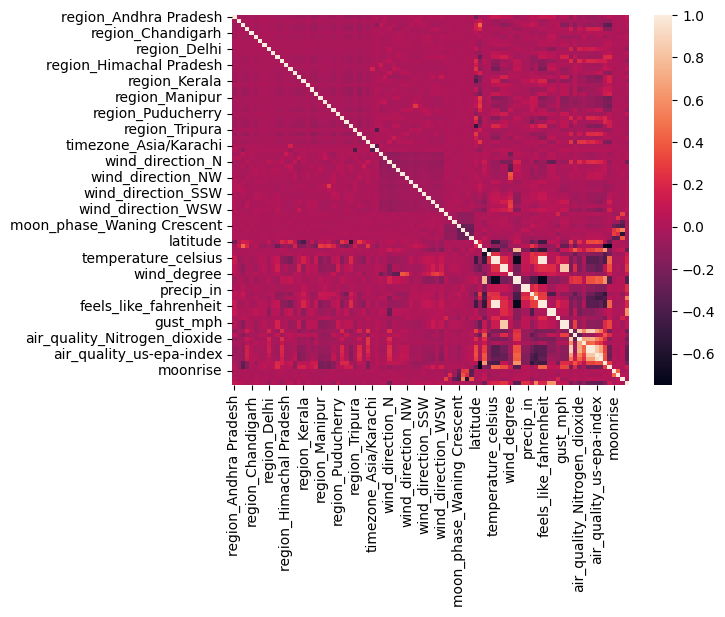

In [58]:
sns.heatmap(DATA.corr())

SEPARATING X AS INPUT AND Y AS OUTPUT

In [59]:
x=DATA.drop(['weather'],axis=1)
x

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination
0,False,False,False,False,False,False,False,False,False,False,...,3.1,40.1,55.1,2,4,5.983333,6.383333,5.116667,6.233333,1
1,False,False,False,False,False,False,False,False,False,False,...,43.4,231.3,266.4,5,10,7.250000,5.483333,7.583333,9.200000,96
2,False,False,False,False,False,False,False,False,False,False,...,1.4,23.6,30.4,2,2,4.833333,5.466667,7.766667,8.033333,88
3,False,False,False,True,False,False,False,False,False,False,...,13.2,287.7,322.8,6,10,6.466667,5.116667,12.333333,12.050000,42
4,False,False,False,True,False,False,False,False,False,False,...,5.4,232.8,257.7,5,10,6.100000,4.866667,3.283333,3.766667,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43995,False,False,False,False,False,False,False,False,False,False,...,1.7,93.1,105.6,4,10,5.900000,6.500000,10.100000,11.316667,70
43996,False,False,False,True,False,False,False,False,False,False,...,3.6,239.6,284.4,5,10,5.800000,5.316667,8.016667,6.866667,5
43997,False,False,False,False,False,False,False,False,False,False,...,3.9,59.3,69.1,3,8,6.766667,6.433333,4.433333,4.666667,93
43998,False,False,False,True,False,False,False,False,False,False,...,6.3,132.4,157.0,4,10,6.250000,5.666667,2.850000,4.300000,89


In [60]:
y=DATA['weather']
y

0        1
1        1
2        1
3        1
4        1
        ..
43995    3
43996    3
43997    3
43998    3
43999    3
Name: weather, Length: 42875, dtype: int64

SPLITTING DATA INTO TRAIN SET AND TEST SET

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [62]:
x_train

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination
22107,False,False,False,False,False,False,False,False,False,False,...,0.6,2.9,4.2,1,1,6.383333,5.833333,4.933333,5.150000,98
16384,False,False,False,False,False,False,False,False,False,False,...,5.8,46.5,74.5,3,5,6.633333,5.483333,3.616667,3.716667,11
17806,False,False,False,False,False,False,False,False,False,False,...,1.9,13.3,15.2,1,2,5.183333,4.833333,2.900000,3.650000,7
6492,False,False,True,False,False,False,False,False,False,False,...,5.0,86.9,104.3,4,10,6.300000,4.883333,4.083333,2.516667,8
29576,True,False,False,False,False,False,False,False,False,False,...,1.8,70.0,80.8,4,9,6.116667,5.883333,6.433333,6.283333,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6472,False,False,False,False,False,True,False,False,False,False,...,2.3,69.0,74.2,4,9,6.666667,5.883333,7.316667,7.800000,98
11677,False,False,False,False,False,False,False,False,False,False,...,7.8,554.0,617.4,6,10,7.350000,5.483333,8.800000,6.666667,2
39148,False,False,False,False,False,False,False,False,False,False,...,3.3,301.0,318.1,6,10,6.850000,5.516667,0.000000,11.966667,51
894,False,False,False,False,False,False,False,False,False,False,...,3.9,111.1,117.5,4,10,7.083333,6.100000,4.516667,4.833333,93


In [63]:
x_test

,region_Andhra Pradesh,region_Arunachal Pradesh,region_Assam,region_Bihar,region_Chandigarh,region_Chhattisgarh,region_Dadra and Nagar Haveli,region_Daman and Diu,region_Delhi,region_Goa,...,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_illumination
9743,False,False,False,False,False,False,False,False,False,False,...,2.0,120.6,133.5,4,10,5.883333,5.900000,4.750000,3.233333,91
24774,False,False,False,False,False,False,False,False,False,False,...,2.0,101.3,109.2,4,10,7.150000,6.083333,1.700000,1.583333,64
12076,False,False,True,False,False,False,False,False,False,False,...,3.2,113.0,125.2,4,10,5.766667,5.450000,0.000000,10.050000,57
11245,False,False,False,False,False,False,False,False,False,False,...,1.5,116.6,151.0,4,10,6.250000,6.183333,6.883333,6.983333,99
28723,False,False,False,False,False,False,False,False,False,False,...,2.1,12.5,17.4,1,2,6.566667,6.700000,12.933333,11.800000,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21532,False,False,False,False,False,False,False,False,False,False,...,29.8,95.8,112.3,4,10,5.400000,5.666667,6.233333,6.483333,1
15820,False,False,False,False,False,False,False,False,False,False,...,0.3,4.0,4.6,1,1,5.016667,5.400000,2.400000,4.100000,8
4016,False,False,False,False,False,False,False,False,False,False,...,6.1,96.3,104.7,4,10,6.616667,5.583333,12.900000,0.000000,45
23607,False,False,False,False,False,False,False,False,False,False,...,5.9,32.7,40.6,2,3,6.466667,6.016667,6.866667,7.183333,99


In [64]:
y_train

22107    2
16384    0
17806    0
6492     1
29576    2
        ..
6472     1
11677    0
39148    3
894      1
16263    0
Name: weather, Length: 30012, dtype: int64

In [65]:
y_test

9743     1
24774    2
12076    0
11245    0
28723    2
        ..
21532    0
15820    0
4016     1
23607    2
21458    0
Name: weather, Length: 12863, dtype: int64

NORMALIZATION

In [66]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

MODEL CREATION

K Nearest Neighbors Model and its Performance Evaluation

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [68]:
# Hyper Parameter Tuning
# from sklearn.model_selection import GridSearchCV
# clf=KNeighborsClassifier()
# pmtr={'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance']}
# gd=GridSearchCV(clf,pmtr,cv=10,scoring='accuracy')  # CV = CrossValidation
# gd.fit(x_train,y_train)

In [69]:
# print(gd.best_params_)

[[2879   59  100  157]
 [  59 2568  483  132]
 [ 167  618 1891  539]
 [ 149  135  595 2332]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      3195
           1       0.76      0.79      0.78      3242
           2       0.62      0.59      0.60      3215
           3       0.74      0.73      0.73      3211

    accuracy                           0.75     12863
   macro avg       0.75      0.75      0.75     12863
weighted avg       0.75      0.75      0.75     12863



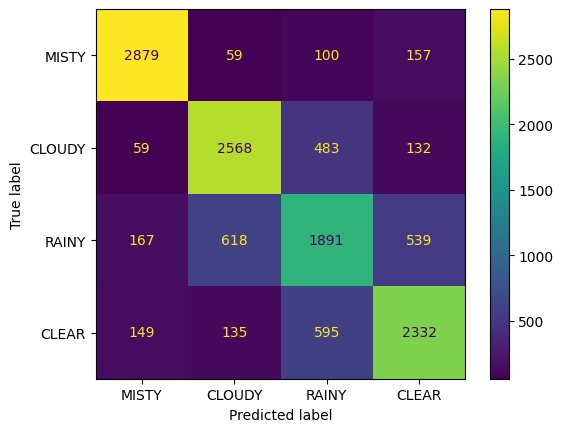

In [70]:
k_model=KNeighborsClassifier(n_neighbors=11,weights='distance')
k_model.fit(x_train,y_train)
y_pred1=k_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred1)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','CLOUDY','RAINY','CLEAR'])
dis.plot()
print(classification_report(y_test,y_pred1))

Support Vector Machine Model and its Performance Evaluation

[[3143    2   24   26]
 [  22 3058  160    2]
 [ 121   50 2713  331]
 [ 147    2  260 2802]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3195
           1       0.98      0.94      0.96      3242
           2       0.86      0.84      0.85      3215
           3       0.89      0.87      0.88      3211

    accuracy                           0.91     12863
   macro avg       0.91      0.91      0.91     12863
weighted avg       0.91      0.91      0.91     12863



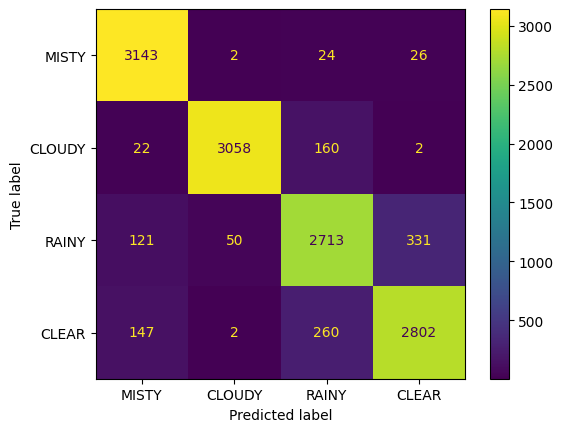

In [71]:
from sklearn.svm import SVC
s_model=SVC()
s_model.fit(x_train,y_train)
y_pred3=s_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred3)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','CLOUDY','RAINY','CLEAR'])
dis.plot()
print(classification_report(y_test,y_pred3))

Decision Tree Model and its Performance Evaluation

[[3099    4   25   67]
 [   4 3224   14    0]
 [  34    5 3172    4]
 [  52    0    4 3155]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3195
           1       1.00      0.99      1.00      3242
           2       0.99      0.99      0.99      3215
           3       0.98      0.98      0.98      3211

    accuracy                           0.98     12863
   macro avg       0.98      0.98      0.98     12863
weighted avg       0.98      0.98      0.98     12863



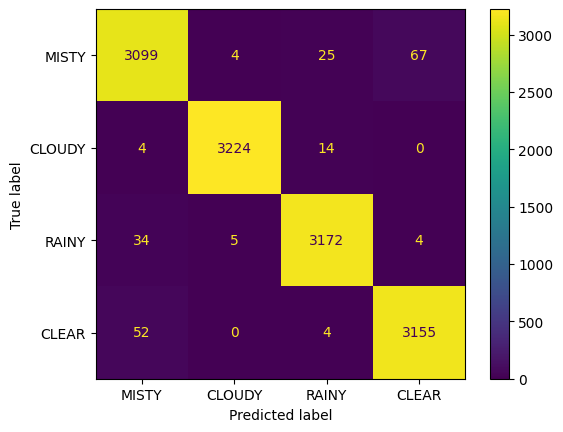

In [72]:
from sklearn.tree import DecisionTreeClassifier
t_model=DecisionTreeClassifier()
t_model.fit(x_train,y_train)
y_pred4=t_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred4)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','CLOUDY','RAINY','CLEAR'])
dis.plot()
print(classification_report(y_test,y_pred4))
# since it has large no. of features, creation of tree is difficult

Random Forest Model and its Performance Evaluation

[[3099    4   25   67]
 [   4 3224   14    0]
 [  34    5 3172    4]
 [  52    0    4 3155]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3195
           1       1.00      0.99      1.00      3242
           2       0.99      0.99      0.99      3215
           3       0.98      0.98      0.98      3211

    accuracy                           0.98     12863
   macro avg       0.98      0.98      0.98     12863
weighted avg       0.98      0.98      0.98     12863



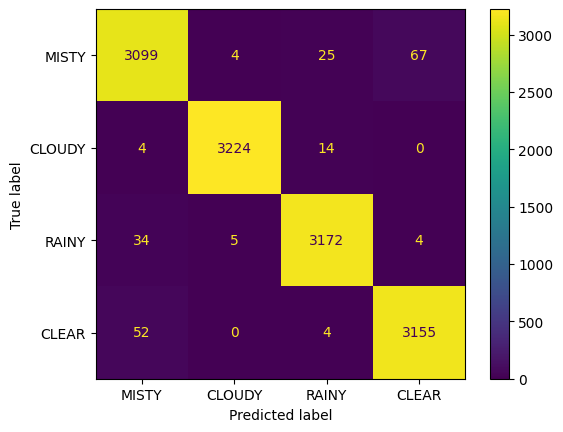

In [73]:
from sklearn.ensemble import RandomForestClassifier
r_model=RandomForestClassifier()
r_model.fit(x_train,y_train)
y_pred5=t_model.predict(x_test)
mat=confusion_matrix(y_test,y_pred5)
print(mat)
dis=ConfusionMatrixDisplay(mat,display_labels=['MISTY','CLOUDY','RAINY','CLEAR'])
dis.plot()
print(classification_report(y_test,y_pred5))

In [74]:
x_test[0:5]

array([[-0.26663098, -0.04765402, -0.21516874, -0.23049194, -0.03875115,
        -0.19357775, -0.04362172, -0.05391909, -0.0752527 , -0.06646556,
        -0.18613653, -0.18363074, -0.08128599, -0.13108596, -0.19246339,
        -0.23368096, -0.20985926, -0.050386  , -0.2952202 , -0.24755247,
        -0.12558669, -0.11489166, -0.11725049, -0.23714949, -0.07981939,
        -0.17451343, -0.23320481, -0.29588667, -0.06821313,  2.98576072,
        -0.10182816, -0.20881872, -0.02309555,  0.06771834, -0.33264182,
        -0.26252166,  2.6532332 , -0.31709629, -0.28761614, -0.23121252,
        -0.22678045, -0.17144858, -0.23193131, -0.17693153, -0.18099671,
        -0.18709255, -0.25674589, -0.23847894, -0.24800695, -0.22161646,
        -0.20363835, -0.20033243, -0.51570845, -0.56662774, -0.49575844,
         2.03381477,  0.85575599,  0.22576585, -0.93874418,  0.33157688,
         1.04551307,  1.04330962, -0.4614698 , -0.46221582, -1.26001284,
        -1.27569236, -1.32293558, -0.21981979, -0.2

In [86]:
value = s_model.predict ([[-0.26663098, -0.04765402, -0.21516874, -0.23049194, -0.03875115,
        -0.19357775, -0.04362172, -0.05391909, -0.0752527 , -0.06646556,
        -0.18613653, -0.18363074, -0.08128599, -0.13108596, -0.19246339,
        -0.23368096, -0.20985926, -0.050386  , -0.2952202 , -0.24755247,
        -0.12558669, -0.11489166, -0.11725049, -0.23714949, -0.07981939,
        -0.17451343, -0.23320481, -0.29588667, -0.06821313,  2.98576072,
        -0.10182816, -0.20881872, -0.02309555,  0.06771834, -0.33264182,
        -0.26252166,  2.6532332 , -0.31709629, -0.28761614, -0.23121252,
        -0.22678045, -0.17144858, -0.23193131, -0.17693153, -0.18099671,
        -0.18709255, -0.25674589, -0.23847894, -0.24800695, -0.22161646,
        -0.20363835, -0.20033243, -0.51570845, -0.56662774, -0.49575844,
         2.03381477,  0.85575599,  0.22576585, -0.93874418,  0.33157688,
         1.04551307,  1.04330962, -0.4614698 , -0.46221582, -1.26001284,
        -1.27569236, -1.32293558, -0.21981979, -0.21552929,  0.09292726,
        -0.94014513,  1.01863264,  1.01565096,  0.68120021,  0.69384064,
        -0.14978348, -0.45703976, -0.45551242,  0.60518459, -1.13969674,
        -0.15297334, -0.32388967,  0.33733529,  0.27469252,  0.61717982,
         1.05571318, -0.80654596,  0.10009446, -0.5524578 , -1.009124  ,
         1.10964127]])
print(value)

[1]


In [76]:
y_test[0:5]

9743     1
24774    2
12076    0
11245    0
28723    2
Name: weather, dtype: int64

In [87]:
if value[0] == 0:
  print('MISTY')
elif value[0] == 1:
  print('CLEAR')
elif value[0] == 2:
  print('CLOUDY')
elif value[0] == 3:
  print('RAINY')
else:
  pass

CLEAR


In [78]:
# pickle used for saving and loading machine learning models, among other purposes.
import pickle
pickle.dump(r_model,open('/content/randomforest_model.pkl','wb'))
# the trained Random Forest model r_model will be saved as a binary file named
# 'randomforest_model.pkl' in the specified location ('/content' directory in this case).
# later can load this model from the saved file using pickle.load() to make predictions on new data or to continue training.

In [79]:
# when you run ! pip install streamlit -q in a Jupyter Notebook or IPython environment,
# it will install the streamlit package quietly, without displaying detailed installation messages
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.2 MB/s eta 0:00:00


In [80]:
DATA.dtypes

region_Andhra Pradesh          bool
region_Arunachal Pradesh       bool
region_Assam                   bool
region_Bihar                   bool
region_Chandigarh              bool
                             ...   
sunset                      float64
moonrise                    float64
moonset                     float64
moon_illumination             int64
weather                       int64
Length: 92, dtype: object

In [81]:
DATA.columns

Index(['region_Andhra Pradesh', 'region_Arunachal Pradesh', 'region_Assam',
       'region_Bihar', 'region_Chandigarh', 'region_Chhattisgarh',
       'region_Dadra and Nagar Haveli', 'region_Daman and Diu', 'region_Delhi',
       'region_Goa', 'region_Gujarat', 'region_Haryana',
       'region_Himachal Pradesh', 'region_Jammu and Kashmir',
       'region_Jharkhand', 'region_Karnataka', 'region_Kerala',
       'region_Lakshadweep', 'region_Madhya Pradesh', 'region_Maharashtra',
       'region_Manipur', 'region_Mizoram', 'region_Nagaland', 'region_Orissa',
       'region_Puducherry', 'region_Punjab', 'region_Rajasthan',
       'region_Tamil Nadu', 'region_Tripura', 'region_Uttar Pradesh',
       'region_Uttarakhand', 'region_West Bengal', 'timezone_Asia/Karachi',
       'timezone_Asia/Kolkata', 'wind_direction_ENE', 'wind_direction_ESE',
       'wind_direction_N', 'wind_direction_NE', 'wind_direction_NNE',
       'wind_direction_NNW', 'wind_direction_NW', 'wind_direction_S',
       'wind

In [82]:
non_boolean_features = [col for col in DATA.columns if DATA[col].dtype != bool]
for i in non_boolean_features:
  print(i,",","max:",max(new_data[i]),"min:",min(new_data[i]))


latitude , max: 34.57 min: 7.17
longitude , max: 95.8 min: 68.97
last_updated_epoch , max: 1709571600 min: 1693286100
last_updated , max: 12 min: 1
temperature_celsius , max: 36.3 min: 5.9
temperature_fahrenheit , max: 97.3 min: 42.7
wind_mph , max: 26.8 min: 2.2
wind_kph , max: 43.2 min: 3.6
wind_degree , max: 360 min: 1
pressure_mb , max: 1026.0 min: 997.0
pressure_in , max: 30.29 min: 29.44
precip_mm , max: 43.8 min: 0.0
precip_in , max: 1.72 min: 0.0
humidity , max: 100 min: 14
cloud , max: 100 min: 0
feels_like_celsius , max: 50.5 min: 3.2
feels_like_fahrenheit , max: 122.9 min: 37.7
visibility_km , max: 10.0 min: 0.0
visibility_miles , max: 6.0 min: 0.0
uv_index , max: 9.0 min: 1.0
gust_mph , max: 51.0 min: 0.0
gust_kph , max: 82.2 min: 0.0
air_quality_Carbon_Monoxide , max: 13458.3 min: 120.2
air_quality_Ozone , max: 234.6 min: 0.0
air_quality_Nitrogen_dioxide , max: 304.3 min: 0.0
air_quality_Sulphur_dioxide , max: 541.7 min: 0.0
air_quality_PM2.5 , max: 1329.2 min: 0.5
air_qua

In [83]:
boolean_features = [col for col in DATA.columns if DATA[col].dtype == bool]
boolean_features

['region_Andhra Pradesh',
 'region_Arunachal Pradesh',
 'region_Assam',
 'region_Bihar',
 'region_Chandigarh',
 'region_Chhattisgarh',
 'region_Dadra and Nagar Haveli',
 'region_Daman and Diu',
 'region_Delhi',
 'region_Goa',
 'region_Gujarat',
 'region_Haryana',
 'region_Himachal Pradesh',
 'region_Jammu and Kashmir',
 'region_Jharkhand',
 'region_Karnataka',
 'region_Kerala',
 'region_Lakshadweep',
 'region_Madhya Pradesh',
 'region_Maharashtra',
 'region_Manipur',
 'region_Mizoram',
 'region_Nagaland',
 'region_Orissa',
 'region_Puducherry',
 'region_Punjab',
 'region_Rajasthan',
 'region_Tamil Nadu',
 'region_Tripura',
 'region_Uttar Pradesh',
 'region_Uttarakhand',
 'region_West Bengal',
 'timezone_Asia/Karachi',
 'timezone_Asia/Kolkata',
 'wind_direction_ENE',
 'wind_direction_ESE',
 'wind_direction_N',
 'wind_direction_NE',
 'wind_direction_NNE',
 'wind_direction_NNW',
 'wind_direction_NW',
 'wind_direction_S',
 'wind_direction_SE',
 'wind_direction_SSE',
 'wind_direction_SSW',


In [84]:
! wget -q -O - ipv4.icanhazip.com

34.16.157.54


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.157.54:8501

npx: installed 22 in 3.604s
your url is: https://huge-poets-cry.loca.lt
